# Comenzando zona de pruebas de litodensidad

#### Datos

In [16]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#datos
datos = pd.read_csv('eval_petro.csv')
datos['DT'] = np.around(np.array( 189 - (datos['RHOB'] -1)*datos['M']/0.01 ),   decimals =4)
datos['N']  = np.around(np.array( (1 - datos['NPHI']) / (datos['RHOB'] - 1)),   decimals = 4)
datos['L']  = np.around(np.array( 0.01 * (189-datos['DT']) / (1-datos['NPHI']) ), decimals =4)

#### Delimitación de la figura

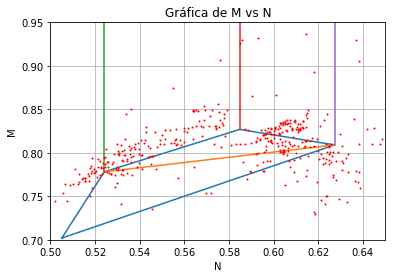

In [17]:
#puntos
P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_final  =[0.702,0.7781,0.8269,0.8091,0.8091,0.702]
P_M1=[0.5241,0.6273]
P_M2=[0.7781,0.8091]
v_x1=[0.5241,0.5241]
v_y1=[0.7781,1.2]
v_x2=[0.5848,0.5848]
v_y2=[0.8269,1.2]
v_x3=[0.6273,0.6273]
v_y3=[0.8091,1.2]


#figura
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='o', markersize=1, linestyle='', color='r', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])
plt.xlim([0.5,0.65])
plt.ylim([0.7,0.95])
#plt.xlim([0.3,1])
#plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('Gráfica de M vs N')
plt.show()


#### Polígono de decisiones 

In [18]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
#vertices del poligono
polygon = Polygon([(0.5241, 0.7781), (0.5848, 0.8269), (0.6273, 0.8091), (0.5241, 0.7781)])


"""definicion de los datos, conversion de datos de serie a numericos tipo array"""
M = np.array(datos['M'])
N = np.array(datos['N'])

#algoritmo para decidir si un punto esta dentro del poligono
i = 0
puntos = []
for numero in M:
    point = Point(N[i],M[i])
    buleano = polygon.contains(point)
    if buleano == True:
        puntos.append('primaria')
    else:
        puntos.append('secundaria')
    i += 1

#no recuerdo por que meti denuevo los datos ¿¿?¿?¿'¿¿'??? xdxdxd
datos['Porosidad'] = puntos
#datos.to_csv('eval_petro_output.csv') #ahhh era para sacar un excel diferente

#### Manipulación de datos como arreglos

In [19]:
PROF = np.array(datos['PROF'])
GR   = np.array(datos['GR'])
LLS  = np.array(datos['LLS'])
FR   = np.array(datos['FR'])
DT   = np.array(datos['DT'])
NPHI = np.array(datos['NPHI'])
RHOB = np.array(datos['RHOB'])
M    = np.array(datos['M'])
N    = np.array(datos['N'])
L    = np.array(datos['L'])
Porosidad = np.array(datos['Porosidad'])
#print(datos)
datos.head()

,PROF,GR,DLL,LLS,FR,DT,NPHI,RHOB,M,N,L,Porosidad
0,3895.4964,13.4288,296.4435,152.3448,73.8266,59.8739,0.0606,2.5407,0.8381,0.6097,1.3746,secundaria
1,3895.6488,13.5247,306.2799,155.8916,68.3078,59.9706,0.0633,2.5486,0.8332,0.6049,1.3775,secundaria
2,3895.8012,13.4533,305.2768,154.7796,68.0374,59.6870,0.0645,2.5578,0.8301,0.6005,1.3823,secundaria
3,3895.9536,12.8354,297.0194,150.2632,71.7124,59.6263,0.0652,2.5606,0.8290,0.5990,1.3840,secundaria
4,3896.1060,11.6641,283.1093,142.4204,77.3886,60.2440,0.0683,2.5554,0.8278,0.5990,1.3819,secundaria


#### Armar el sistema de ecuaciones y resolverlo

In [23]:
# define matrix A using Numpy arrays
A = np.matrix([ [189, 43.5, 55.5,   120],
                [1.0, 0.02, -0.035, 0.33],
                [1.0, 2.87, 2.65,   2.35],
                [1.0, 1.0,  1.0,    1.0]    ])

#define matrix B
b = np.matrix([ [DT],
                [NPHI],
                [RHOB],
                [1] ])

# b = np.array([73.9477, 0.1275, 2.6503, 1])
#B = np.array([59.8739, 0.0606, 2.5407, 1])
#x = np.around(np.linalg.solve(A, B), decimals = 4)

A_inverse = np.linalg.inv(A)
X = A_inverse * b

FIP  =  X[0]
VDOL =  X[1]
VSIL =  X[2]
VARC =  X[3]

#La idea de poner 2 shape es para que el arreglo quede de tamaño (400,1)
#hasta el momento no he encontrado como optimizar este detalle
FIP = np.array(FIP.T)[0]
FIP.shape
FIP = np.array(FIP.T)[0]
FIP.shape

VDOL = np.array(VDOL.T)[0]
VDOL.shape
VDOL = np.array(VDOL.T)[0]
VDOL.shape

VSIL = np.array(VSIL.T)[0]
VSIL.shape
VSIL = np.array(VSIL.T)[0]
VSIL.shape

VARC = np.array(VARC.T)[0]
VARC.shape
VARC = np.array(VARC.T)[0]
VARC.shape

VCAL = np.array(VARC*0.0000)

FIS = np.array(VARC*0.0000)

#### Acomodar los resultados en la tabla de datos

In [24]:
datos['VDOL'] = np.around(VDOL, decimals = 4)
datos['VCAL'] = np.around(VCAL, decimals = 4)
datos['VSIL'] = np.around(VSIL, decimals = 4)
datos['VARC'] = np.around(VARC, decimals = 4)
datos['FIS'] = np.around(FIS, decimals = 4) 
datos['FIP']  = np.around(FIP,  decimals = 4)
datos

,PROF,GR,DLL,LLS,FR,DT,NPHI,RHOB,M,N,L,Porosidad,VDOL,VCAL,VSIL,VARC,FIS,FIP
0,3895.4964,13.4288,296.4435,152.3448,73.8266,59.8739,0.0606,2.5407,0.8381,0.6097,1.3746,secundaria,0.2787,-0.0,0.7417,-0.1513,-0.0,0.1309
1,3895.6488,13.5247,306.2799,155.8916,68.3078,59.9706,0.0633,2.5486,0.8332,0.6049,1.3775,secundaria,0.3051,-0.0,0.7047,-0.1368,-0.0,0.1270
2,3895.8012,13.4533,305.2768,154.7796,68.0374,59.6870,0.0645,2.5578,0.8301,0.6005,1.3823,secundaria,0.3346,-0.0,0.6709,-0.1296,-0.0,0.1241
3,3895.9536,12.8354,297.0194,150.2632,71.7124,59.6263,0.0652,2.5606,0.8290,0.5990,1.3840,secundaria,0.3449,-0.0,0.6588,-0.1270,-0.0,0.1233
4,3896.1060,11.6641,283.1093,142.4204,77.3886,60.2440,0.0683,2.5554,0.8278,0.5990,1.3819,secundaria,0.3388,-0.0,0.6578,-0.1212,-0.0,0.1245
5,3896.2584,10.4553,262.8993,131.4064,79.0604,61.6024,0.0749,2.5459,0.8241,0.5984,1.3771,secundaria,0.3271,-0.0,0.6519,-0.1048,-0.0,0.1258
6,3896.4108,9.8736,238.5601,119.0484,70.0088,63.6837,0.0838,2.5262,0.8211,0.6003,1.3678,secundaria,0.2937,-0.0,0.6640,-0.0879,-0.0,0.1302
7,3896.5632,10.1951,215.5799,107.8764,54.3154,66.2083,0.0931,2.5048,0.8160,0.6027,1.3540,primaria,0.2483,-0.0,0.6810,-0.0616,-0.0,0.1323
8,3896.7156,10.9099,197.9877,98.7064,42.1844,68.7729,0.1018,2.4799,0.8124,0.6069,1.3385,primaria,0.1926,-0.0,0.7114,-0.0399,-0.0,0.1360
9,3896.8680,11.1449,183.6905,89.9700,37.8660,71.2857,0.1103,2.4565,0.8082,0.6108,1.3231,primaria,0.1394,-0.0,0.7385,-0.0169,-0.0,0.1389
